https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 

In [2]:
# Import diabetes_prediction_dataset.csv
import pandas as pd
df = pd.read_csv('diabetes.csv')

# Change 'No Info' to 'no info' in smoking_history column
df['smoking_history'] = df['smoking_history'].replace('No Info', 'no info')
df['gender'] = df['gender'].replace('Female', 'female')
df['gender'] = df['gender'].replace('Male', 'male')
df['gender'] = df['gender'].replace('Other', 'other')

X = df.drop('diabetes', axis=1)
y = df['diabetes']

data = pd.concat([X, y], axis=1)

display(df.head())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80.0,0,1,never,25.19,6.6,140,0
1,female,54.0,0,0,no info,27.32,6.6,80,0
2,male,28.0,0,0,never,27.32,5.7,158,0
3,female,36.0,0,0,current,23.45,5.0,155,0
4,male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Separate 'gender' column into 'female', 'male', 'other' columns (1 = yes, 0 = no)
df['female'] = (df['gender'] == 'female').astype(int)
df['male'] = (df['gender'] == 'male').astype(int)
df['other'] = (df['gender'] == 'other').astype(int)

df = df.drop('gender', axis=1)
cols = ['female', 'male', 'other'] + [col for col in df.columns if col not in ['female', 'male', 'other']]
df = df[cols]

display(df.head())

,female,male,other,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,0,80.0,0,1,never,25.19,6.6,140,0
1,1,0,0,54.0,0,0,no info,27.32,6.6,80,0
2,0,1,0,28.0,0,0,never,27.32,5.7,158,0
3,1,0,0,36.0,0,0,current,23.45,5.0,155,0
4,0,1,0,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Convert all values in 'gender' and 'smoking_history' columns to string
df['smoking_history'] = df['smoking_history'].astype(str)
print('smoking_history dtype:', df['smoking_history'].dtype)
print('smoking_history unique values:', df['smoking_history'].unique())

smoking_history dtype: object
smoking_history unique values: ['never' 'no info' 'current' 'former' 'ever' 'not current']


In [5]:
# Check for null and NaN values in the dataset
df_null = df.isnull().sum()
df_nan = df.isna().sum()
print('Missing (null) values per column:')
print(df_null)
print('\nMissing (NaN) values per column:')
print(df_nan)
print('\nTotal missing values:', df_null.sum())
print('Total NaN values:', df_nan.sum())
missing_rows = df[df.isnull().any(axis=1)]

Missing (null) values per column:
female                 0
male                   0
other                  0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Missing (NaN) values per column:
female                 0
male                   0
other                  0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Total missing values: 0
Total NaN values: 0


In [6]:
# Calculate summary statistics for numeric columns
numeric_df = df.select_dtypes(include='number')

print("MEAN:")
print(numeric_df.mean())
print("\nMEDIAN:")
print(numeric_df.median())
print("\nSTANDARD DEVIATION:")
print(numeric_df.std())

MEAN:
female                   0.585520
male                     0.414300
other                    0.000180
age                     41.885856
hypertension             0.074850
heart_disease            0.039420
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
diabetes                 0.085000
dtype: float64

MEDIAN:
female                   1.00
male                     0.00
other                    0.00
age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64

STANDARD DEVIATION:
female                  0.492635
male                    0.492603
other                   0.013415
age                    22.516840
hypertension            0.263150
heart_disease           0.194593
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.7081

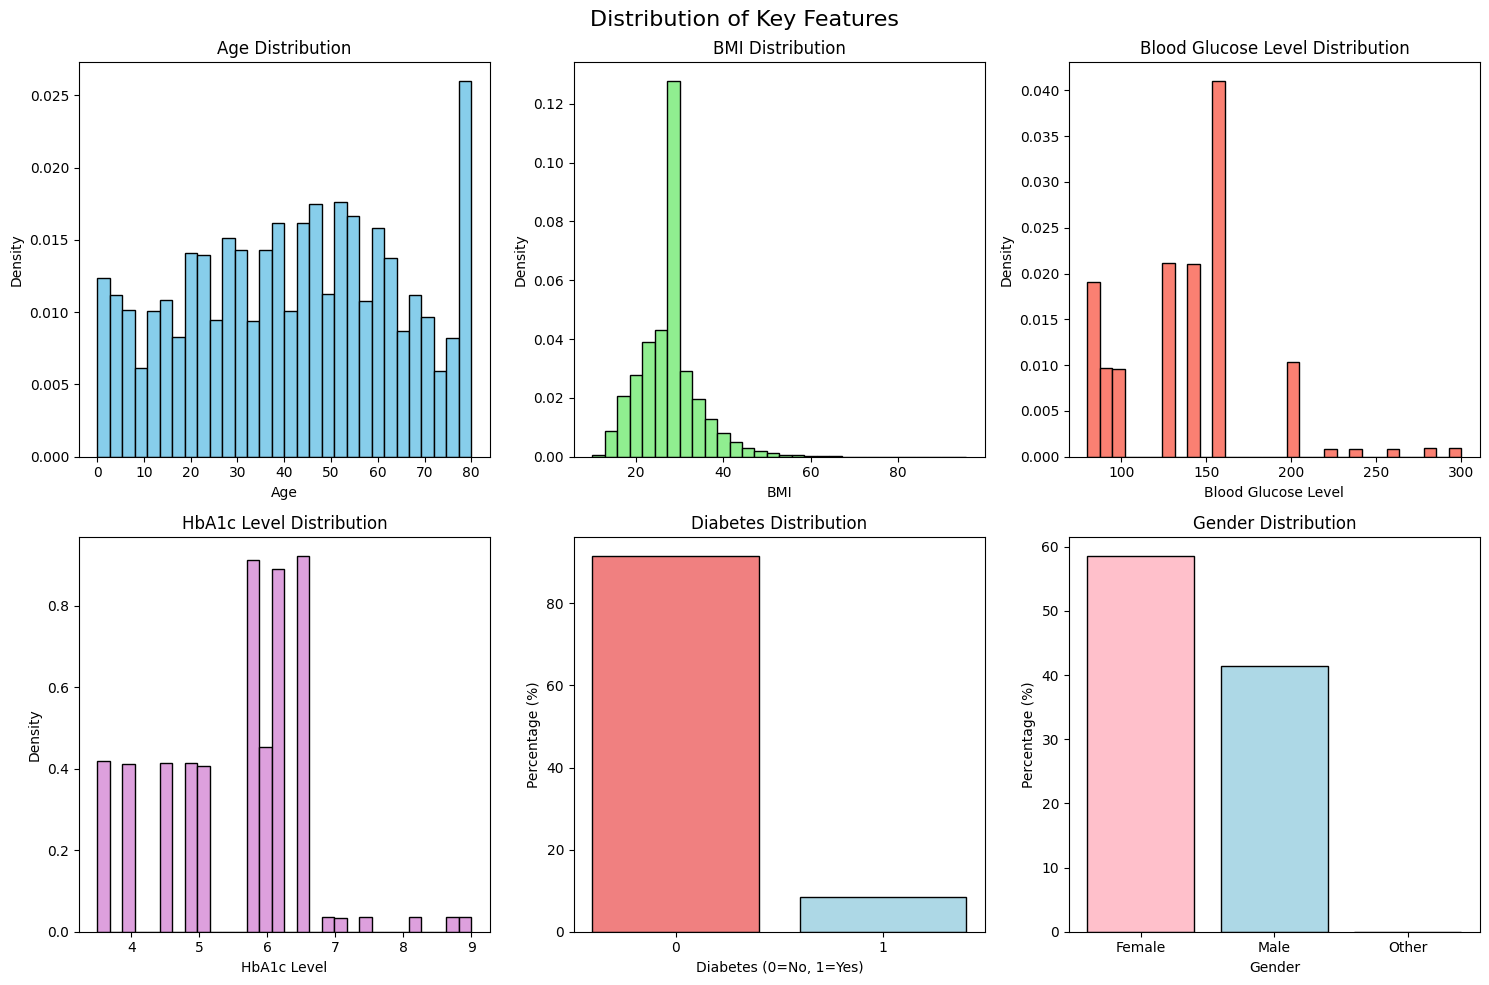

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Age distribution (density)
axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black', density=True)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')

# BMI distribution (density)
axes[0, 1].hist(df['bmi'], bins=30, color='lightgreen', edgecolor='black', density=True)
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Density')

# Blood glucose level distribution (density)
axes[0, 2].hist(df['blood_glucose_level'], bins=30, color='salmon', edgecolor='black', density=True)
axes[0, 2].set_title('Blood Glucose Level Distribution')
axes[0, 2].set_xlabel('Blood Glucose Level')
axes[0, 2].set_ylabel('Density')

# HbA1c level distribution (density)
axes[1, 0].hist(df['HbA1c_level'], bins=30, color='plum', edgecolor='black', density=True)
axes[1, 0].set_title('HbA1c Level Distribution')
axes[1, 0].set_xlabel('HbA1c Level')
axes[1, 0].set_ylabel('Density')

# Diabetes distribution (percentages)
diabetes_counts = df['diabetes'].value_counts()
diabetes_pct = (diabetes_counts / len(df)) * 100
axes[1, 1].bar(diabetes_pct.index, diabetes_pct.values, color=['lightcoral', 'lightblue'], edgecolor='black')
axes[1, 1].set_title('Diabetes Distribution')
axes[1, 1].set_xlabel('Diabetes (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xticks([0, 1])

# Gender distribution (percentages)
gender_counts = df[['female', 'male', 'other']].sum()
gender_pct = (gender_counts / len(df)) * 100
axes[1, 2].bar(['Female', 'Male', 'Other'], gender_pct.values, color=['pink', 'lightblue', 'lightgray'], edgecolor='black')
axes[1, 2].set_title('Gender Distribution')
axes[1, 2].set_xlabel('Gender')
axes[1, 2].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

### Classification

In [8]:
# Show feature information for the diabetes dataset
print("Feature information (X.info()):")
X.info()

Feature information (X.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.1+ MB


In [9]:
#target information
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: diabetes
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [10]:
print("X:", X.isnull().sum())
print("y:", y.isnull().sum())

X: gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64
y: 0


In [11]:
print(y.isnull().sum())

0


In [12]:
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

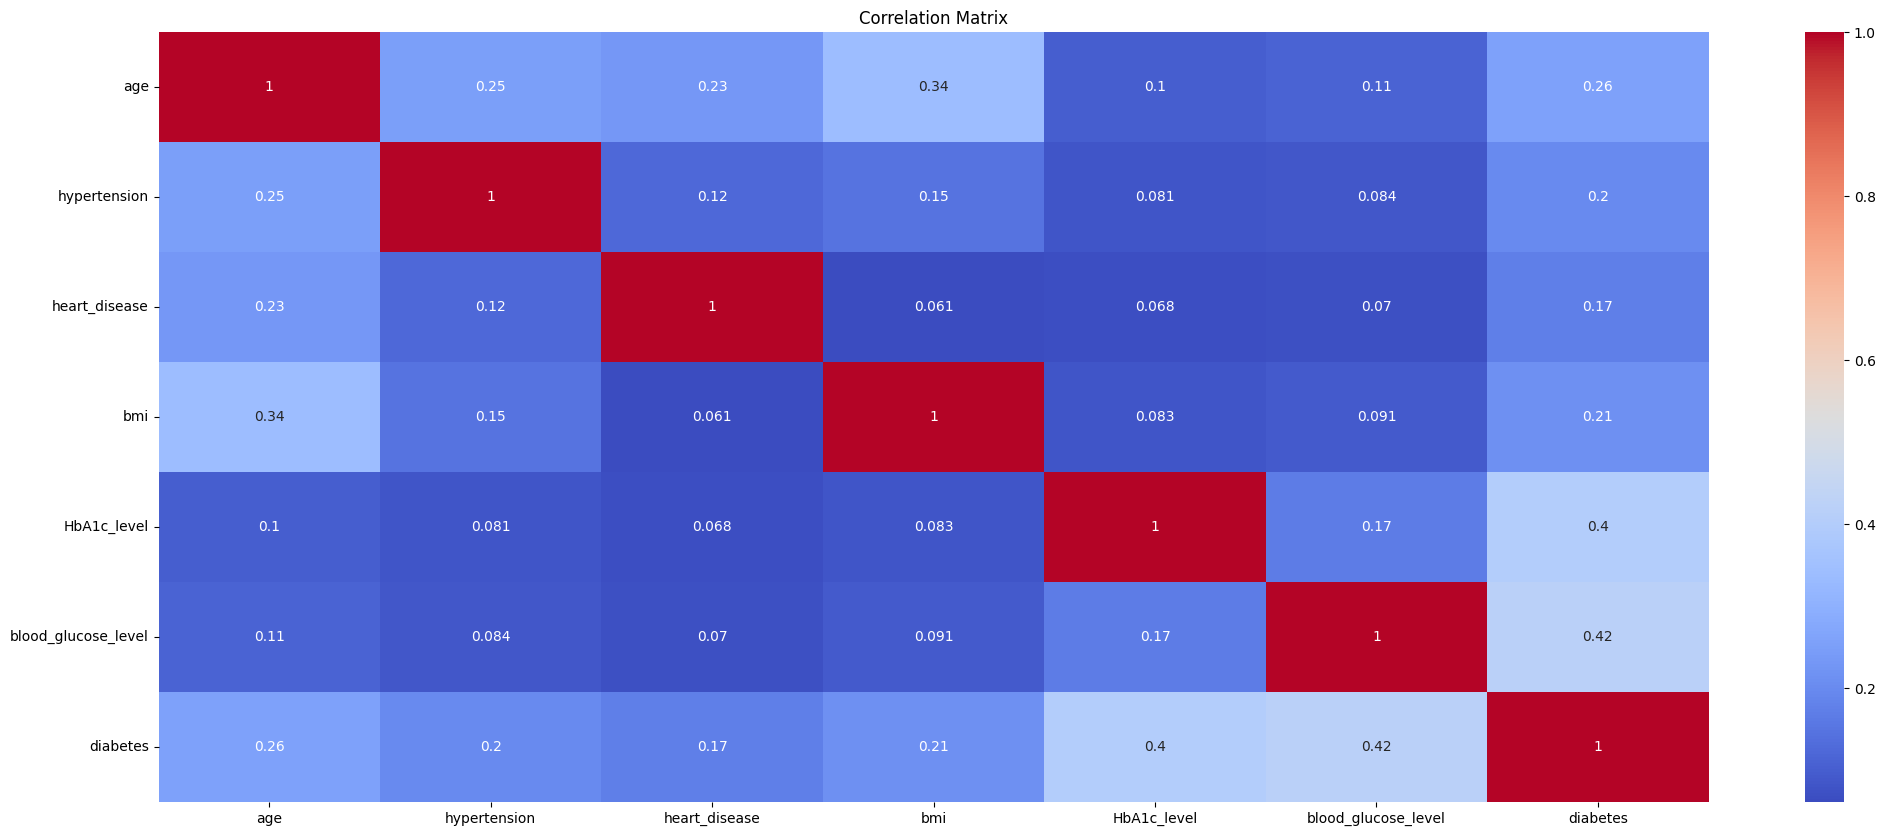

In [13]:
# Concatenate features and target into a single DataFrame
diabetes_data = pd.concat([X, y], axis=1)

# Compute correlation matrix
corr_matrix = diabetes_data.select_dtypes(include='number').corr()

# Visualize the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Threshold for considering features as highly correlated
threshold = 0.3

# Find pairs of features with correlation above the threshold
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs >= threshold)]

print('Highly correlated feature pairs:')
print(high_corr)

Highly correlated feature pairs:
blood_glucose_level  diabetes               0.419558
diabetes             blood_glucose_level    0.419558
                     HbA1c_level            0.400660
HbA1c_level          diabetes               0.400660
age                  bmi                    0.337396
bmi                  age                    0.337396
dtype: float64


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Train-test split with stratification
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure only numeric columns are used for training
df_X_train = df_X_train.select_dtypes(include='number')
df_X_test = df_X_test.select_dtypes(include='number')

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df_X_train, df_y_train)
df_y_pred = rf_model.predict(df_X_test)
df_y_pred_proba = rf_model.predict_proba(df_X_test)[:, 1]

# Classification Report
print('Classification Report:')
print(classification_report(df_y_test, df_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.91      0.70      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



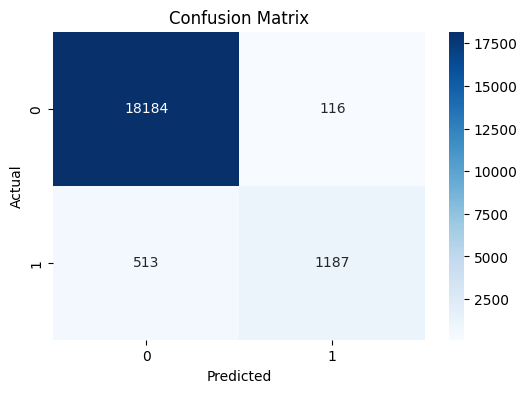

In [17]:
# Confusion Matrix for diabetes prediction
conf_matrix = confusion_matrix(df_y_test, df_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

Mean Squared Error (MSE): 0.025384346603674852
R2 Score (R²): 0.6750048189931273


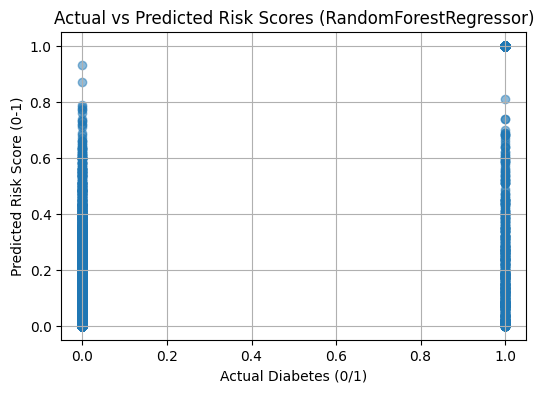

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset and Preprocessing (One-Hot Encoding)
df = pd.read_csv("diabetes.csv")
df_processed = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# 2. Define X and y
y = df_processed['diabetes']
X = df_processed.drop('diabetes', axis=1)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and Train the Regression Model
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 5. Making predictions (continuous risk scores between 0 and 1)
y_pred = model.predict(X_test)

# 6. Evaluating the model with Regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score (R²): {r2}')

# 7. Visualize Actual vs Predicted Risk Scores
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Diabetes (0/1)")
plt.ylabel("Predicted Risk Score (0-1)")
plt.title("Actual vs Predicted Risk Scores (RandomForestRegressor)")
plt.grid(True)
plt.show()

### Logistic Regression

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



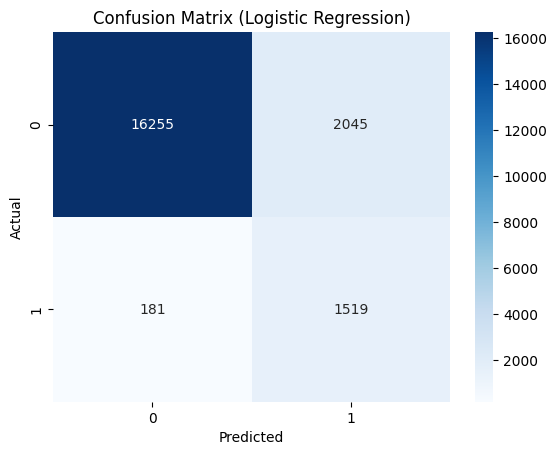

ROC-AUC: 0.963


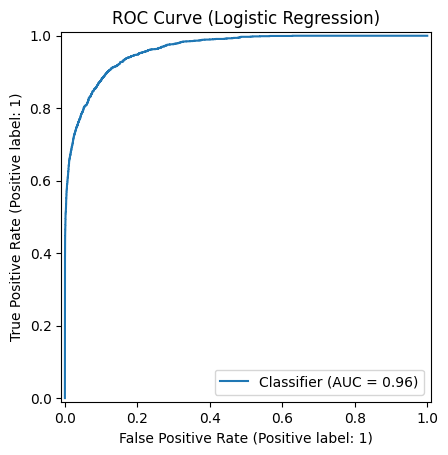

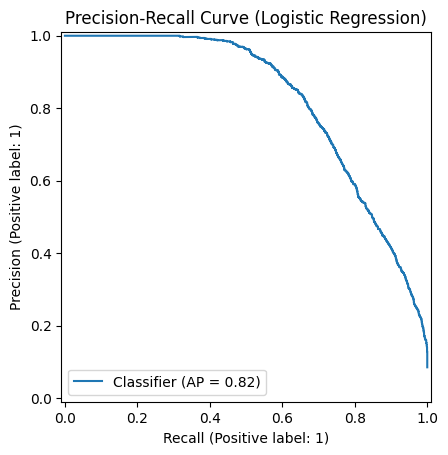

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Prepare data (re-use df if available)
try:
    df
except NameError:
    df = pd.read_csv('diabetes.csv')

# One-hot encode categoricals
df_lr = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Features/target
X_lr = df_lr.drop('diabetes', axis=1)
y_lr = df_lr['diabetes']

# Train-test split (stratified)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr)

# Model: class-weight balanced helps with imbalance
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train_lr, y_train_lr)

# Predictions
y_pred_lr = log_reg.predict(X_test_lr)
y_proba_lr = log_reg.predict_proba(X_test_lr)[:, 1]

# Metrics
print('Classification Report (Logistic Regression):')
print(classification_report(y_test_lr, y_pred_lr))

cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_lr = roc_auc_score(y_test_lr, y_proba_lr)
print(f'ROC-AUC: {roc_auc_lr:.3f}')
RocCurveDisplay.from_predictions(y_test_lr, y_proba_lr)
plt.title('ROC Curve (Logistic Regression)')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test_lr, y_proba_lr)
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.show()

Logistic regression looks at user's health information and guess if they have diabetes (like random forest). The classification report: Precision - how many people really had diabetes out of the people the model said yes, Recall - how many people that have diabetes that the model caught, F-1 score - combines precision and recall. The confusion matrix hows that the model is the best at saying "no diabetes", then saying yes when users don't. This can be problematic when telling users they have diabetes when they don't - something that need to improve in. The ROC curve & AUC shows how good the model is at telling yes from no. And the precision recall curve shows this model is not the best at catching people who have diabetes. These results show that this model is correct, but makes mistakes.

### Linear Regression

Mean Squared Error: 0.051179168858889484
R2 Score: 0.3447543280602635


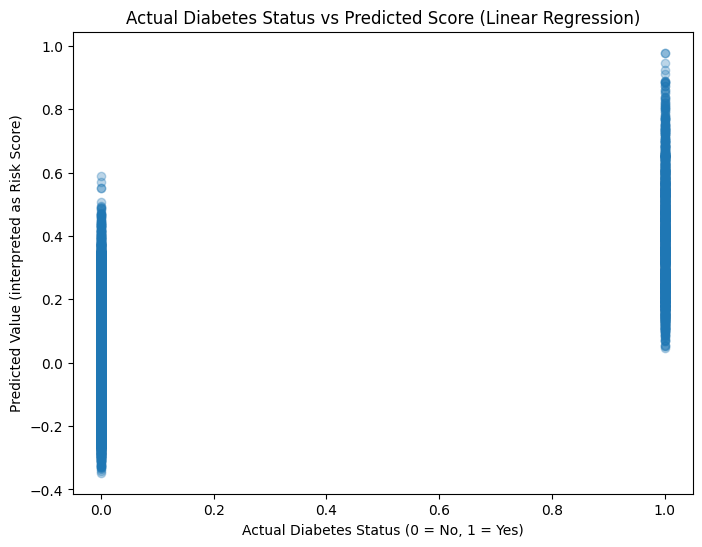

In [20]:
# Convert categorical text data (gender, smoking_history) into numbers
df_processed = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Define Features (X) and Target (y)
y = df_processed['diabetes']  # Target: 0 (No) or 1 (Yes)
X = df_processed.drop('diabetes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3) # alpha makes points transparent to see density
plt.xlabel("Actual Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Predicted Value (interpreted as Risk Score)")
plt.title("Actual Diabetes Status vs Predicted Score (Linear Regression)")
plt.show()

The low MSE shows that the error od prediction and the actual result is small. The R2 score is lower than the Random Forest because Linear Regression is on a straight line, which is harder to fir to a binary data (less accurate). The plot shows that there are lower values for users who don't have diabetes, and higher values for users who have diabetes. The linear regression can produce the risk score that the app can show the user, and the low MSE means show it can give a reasonably close prediction. 

The best is to use Random Forest because it uses many yes/no rules (building a lot of decision trees). With all the information and votes gathered from all the trees, it results in the most accurate guess and prediction. Logistic regression is good when the job to calculate the probability (smoother S-curve, and better for understanding), but not as accurate. Linear regression would not be good in this case, because it can only find a single straight line, which is bad when the answer is only 1 or 0 in this case (limits accuracy).